In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from pandas_profiling import ProfileReport

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок
pd.set_option('chained',None)

In [2]:
df = pd.read_csv('stud_math.csv')
df

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     NaN       A   4.0   4.0   at_home   teacher   
1       GP   F   17       U     GT3     NaN   1.0   1.0   at_home     other   
2       GP   F   15       U     LE3       T   1.0   1.0   at_home     other   
3       GP   F   15       U     GT3       T   4.0   2.0    health       NaN   
4       GP   F   16       U     GT3       T   3.0   3.0     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A   2.0   2.0  services  services   
391     MS   M   17       U     LE3       T   3.0   1.0  services  services   
392     MS   M   21       R     GT3       T   1.0   1.0     other     other   
393     MS   M   18       R     LE3       T   3.0   2.0  services     other   
394     MS   M   19       U     LE3       T   1.0   1.0     other   at_home   

     reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0    course   mother         2.0        2.0       0.0       yes     no   no   
1    course   father         1.0        2.0       0.0        no    yes   no   
2     other   mother         1.0        2.0       3.0       yes     no  NaN   
3      home   mother         1.0        3.0       0.0        no    yes  yes   
4      home   father         1.0        2.0       0.0        no    yes  yes   
..      ...      ...         ...        ...       ...       ...    ...  ...   
390  course      NaN         1.0        2.0       2.0        no    yes  yes   
391  course   mother         2.0        1.0       0.0        no     no   no   
392  course      NaN         1.0        1.0       3.0       NaN     no   no   
393  course   mother         3.0        1.0       0.0        no     no   no   
394     NaN   father         1.0        1.0       0.0       NaN     no   no   

    activities nursery  studytime, granular higher internet romantic  famrel  \
0           no     yes                 -6.0    yes      NaN       no     4.0   
1           no      no                 -6.0    yes      yes       no     5.0   
2           no     yes                 -6.0    yes      yes      NaN     4.0   
3          yes     yes                 -9.0    yes      yes      yes     3.0   
4           no     yes                 -6.0    yes       no       no     4.0   
..         ...     ...                  ...    ...      ...      ...     ...   
390         no     yes                 -6.0    yes       no       no     5.0   
391         no      no                 -3.0    yes      yes       no     2.0   
392         no      no                 -3.0    NaN       no       no     5.0   
393        NaN      no                 -3.0    yes      yes       no     4.0   
394         no     yes                 -3.0    yes      yes       no     3.0   

     freetime  goout  health  absences  score  
0         3.0    4.0     3.0       6.0   30.0  
1         3.0    3.0     3.0       4.0   30.0  
2         3.0    2.0     3.0      10.0   50.0  
3         2.0    2.0     5.0       2.0   75.0  
4         3.0    2.0     5.0       4.0   50.0  
..        ...    ...     ...       ...    ...  
390       5.0    4.0     4.0     212.0   45.0  
391       4.0    5.0     2.0       3.0   80.0  
392       5.0    3.0     3.0       3.0   35.0  
393       4.0    1.0     5.0       0.0   50.0  
394       2.0    3.0     5.0       5.0   45.0  

[395 rows x 30 columns]

In [3]:
df.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  392.000000  371.000000  367.000000  388.000000  373.000000   
mean    16.696203    2.750000    2.614555    1.438692    2.038660    0.337802   
std      1.276043    1.098127    2.228732    0.694181    0.842078    0.743135   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000   40.000000    4.000000    4.000000    3.000000   

       studytime, granular      famrel    freetime       goout      health  \
count           388.000000  368.000000  384.000000  387.000000  380.000000   
mean             -6.115979    3.937500    3.231771    3.105943    3.531579   
std               2.526235    0.927277    0.993940    1.115896    1.396019   
min             -12.000000   -1.000000    1.000000    1.000000    1.000000   
25%              -6.000000    4.000000    3.000000    2.000000    3.000000   
50%              -6.000000    4.000000    3.000000    3.000000    4.000000   
75%              -3.000000    5.000000    4.000000    4.000000    5.000000   
max              -3.000000    5.000000    5.000000    5.000000    5.000000   

         absences       score  
count  383.000000  389.000000  
mean     7.279373   52.262211  
std     23.465197   22.919022  
min      0.000000    0.000000  
25%      0.000000   40.000000  
50%      4.000000   55.000000  
75%      8.000000   70.000000  
max    385.000000  100.000000

In [4]:
display(df.head(10))
df.info()

school sex  age address famsize Pstatus  Medu  Fedu      Mjob     Fjob  \
0     GP   F   18       U     NaN       A   4.0   4.0   at_home  teacher   
1     GP   F   17       U     GT3     NaN   1.0   1.0   at_home    other   
2     GP   F   15       U     LE3       T   1.0   1.0   at_home    other   
3     GP   F   15       U     GT3       T   4.0   2.0    health      NaN   
4     GP   F   16       U     GT3       T   3.0   3.0     other    other   
5     GP   M   16       U     LE3       T   4.0   3.0  services    other   
6     GP   M   16     NaN     LE3       T   2.0   2.0     other    other   
7     GP   F   17       U     GT3       A   4.0   4.0     other  teacher   
8     GP   M   15       U     LE3       A   3.0   2.0  services    other   
9     GP   M   15       U     NaN     NaN   3.0   4.0     other    other   

       reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0      course   mother         2.0        2.0       0.0       yes     no   no   
1      course   father         1.0        2.0       0.0        no    yes   no   
2       other   mother         1.0        2.0       3.0       yes     no  NaN   
3        home   mother         1.0        3.0       0.0        no    yes  yes   
4        home   father         1.0        2.0       0.0        no    yes  yes   
5  reputation   mother         1.0        2.0       0.0        no    yes  yes   
6        home   mother         1.0        2.0       0.0        no     no   no   
7        home   mother         2.0        2.0       0.0       yes    yes   no   
8        home   mother         1.0        2.0       0.0        no    yes  yes   
9        home   mother         1.0        2.0       0.0        no    yes  yes   

  activities nursery  studytime, granular higher internet romantic  famrel  \
0         no     yes                 -6.0    yes      NaN       no     4.0   
1         no      no                 -6.0    yes      yes       no     5.0   
2         no     yes                 -6.0    yes      yes      NaN     4.0   
3        yes     yes                 -9.0    yes      yes      yes     3.0   
4         no     yes                 -6.0    yes       no       no     4.0   
5        yes     yes                 -6.0    yes      yes       no     5.0   
6         no     yes                 -6.0    yes      yes       no     4.0   
7         no     yes                 -6.0    yes       no       no     4.0   
8         no     yes                 -6.0    yes      yes       no     NaN   
9        yes     yes                 -6.0    yes      yes       no     5.0   

   freetime  goout  health  absences  score  
0       3.0    4.0     3.0       6.0   30.0  
1       3.0    3.0     3.0       4.0   30.0  
2       3.0    2.0     3.0      10.0   50.0  
3       2.0    2.0     5.0       2.0   75.0  
4       3.0    2.0     5.0       4.0   50.0  
5       4.0    2.0     5.0      10.0   75.0  
6       4.0    4.0     3.0       0.0   55.0  
7       1.0    4.0     1.0       6.0   30.0  
8       2.0    2.0     1.0       0.0   95.0  
9       5.0    1.0     5.0       0.0   75.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [5]:
# делаем копию исходного датафрейма и поменяем названия столбцов на более понятные
students_stat = df.copy()
students_stat = students_stat.rename(columns={'sex': 'students_gender', 'age': 'students_age',
                              'famsize': 'family_size', 'Pstatus': 'parents_status',
                              'Medu': 'mother_education', 'Fedu': 'father_education',
                              'Mjob': 'mother_job', 'Fjob': 'father_job', 'reason': 'reason_school_choosing',
                              'traveltime': 'travel_time', 'studytime': 'study_time',
                              'schoolsup': 'school_educational_support', 'famsup': 'family_educational_support',
                              'paid': 'additional_paid_lessons', 'activities': 'additional_extracurricular_activities',
                              'studytime, granular': 'studytime_granular', 'higher': 'get_higher_education',
                              'romantic': 'in_romantic_relationship', 'famrel': 'family_relationships',
                              'freetime': 'free_time', 'goout': 'go_out', 'health': 'health_status',
                              'score': 'state_exam_scores'})
students_stat

school students_gender  students_age address family_size parents_status  \
0       GP               F            18       U         NaN              A   
1       GP               F            17       U         GT3            NaN   
2       GP               F            15       U         LE3              T   
3       GP               F            15       U         GT3              T   
4       GP               F            16       U         GT3              T   
..     ...             ...           ...     ...         ...            ...   
390     MS               M            20       U         LE3              A   
391     MS               M            17       U         LE3              T   
392     MS               M            21       R         GT3              T   
393     MS               M            18       R         LE3              T   
394     MS               M            19       U         LE3              T   

     mother_education  father_education mother_job father_job  \
0                 4.0               4.0    at_home    teacher   
1                 1.0               1.0    at_home      other   
2                 1.0               1.0    at_home      other   
3                 4.0               2.0     health        NaN   
4                 3.0               3.0      other      other   
..                ...               ...        ...        ...   
390               2.0               2.0   services   services   
391               3.0               1.0   services   services   
392               1.0               1.0      other      other   
393               3.0               2.0   services      other   
394               1.0               1.0      other    at_home   

    reason_school_choosing guardian  travel_time  study_time  failures  \
0                   course   mother          2.0         2.0       0.0   
1                   course   father          1.0         2.0       0.0   
2                    other   mother          1.0         2.0       3.0   
3                     home   mother          1.0         3.0       0.0   
4                     home   father          1.0         2.0       0.0   
..                     ...      ...          ...         ...       ...   
390                 course      NaN          1.0         2.0       2.0   
391                 course   mother          2.0         1.0       0.0   
392                 course      NaN          1.0         1.0       3.0   
393                 course   mother          3.0         1.0       0.0   
394                    NaN   father          1.0         1.0       0.0   

    school_educational_support family_educational_support  \
0                          yes                         no   
1                           no                        yes   
2                          yes                         no   
3                           no                        yes   
4                           no                        yes   
..                         ...                        ...   
390                         no                        yes   
391                         no                         no   
392                        NaN                         no   
393                         no                         no   
394                        NaN                         no   

    additional_paid_lessons additional_extracurricular_activities nursery  \
0                        no                                    no     yes   
1                        no                                    no      no   
2                       NaN                                    no     yes   
3                       yes                                   yes     yes   
4                       yes                                    no     yes   
..                      ...                                   ...     ...   
390                     yes                                    no     yes   
391                      no         

In [6]:
# Проверим корректность названий
students_stat.columns

Index(['school', 'students_gender', 'students_age', 'address', 'family_size',
       'parents_status', 'mother_education', 'father_education', 'mother_job',
       'father_job', 'reason_school_choosing', 'guardian', 'travel_time',
       'study_time', 'failures', 'school_educational_support',
       'family_educational_support', 'additional_paid_lessons',
       'additional_extracurricular_activities', 'nursery',
       'studytime_granular', 'get_higher_education', 'internet',
       'in_romantic_relationship', 'family_relationships', 'free_time',
       'go_out', 'health_status', 'absences', 'state_exam_scores'],
      dtype='object')

# Формулы для расчета

In [7]:
def IQR(x):
    '''Функция для расчета  межквартильного размаха'''
    return x.quantile(0.75) - x.quantile(0.25)

def perc25(x):
    '''Функция для расчета нижнего квартиля'''
    return x.quantile(0.25)

def perc75(x):
    '''Функция для расчета верхнего квартиля'''
    return x.quantile(0.75)

def outlier_low(x):
    '''Функция для расчета границы нижнего выброса'''
    return perc25(x) - 1.5*IQR(x)

def outlier_high(x):
    '''Функция для расчета границы верхнего выброса'''
    return perc75(x) + 1.5*IQR(x)

def elem_change(x):
    '''
    Функция заменяет в колонках датасета NaN на моду либо медиану в зависимости от типа данных
    '''
    print(f'Проверим уникальность значений в колонке до замены:\n{x.unique()}')
    students_stat.additional_paid_lessons
    print('___________________________________________________________________')
    print(f'Проверим количество уникальных значений в колонке до замены:\n{x.value_counts()}')
    print('___________________________________________________________________')
    print(f'Проверим количество значений = "Nan" в колонке до замены:\n{x.isnull().value_counts(ascending = True)}')
    if x.dtypes == 'float64':
        print('___________________________________________________________________')
        print(f'Значения в столбце имеют тип {x.dtypes}, "NaN" будут заменены на медиану:\n{x.median(skipna=True)}')
        x.fillna(math.ceil(x.median(skipna=True)), inplace=True)
    elif x.dtypes == 'int64':
        print('___________________________________________________________________')
        print(f'Значения в столбце имеют тип {x.dtypes}, "NaN" будут заменены на медиану:\n{x.median(skipna=True)}')
        x.fillna(math.ceil(x.median(skipna=True)), inplace=True)
    elif x.dtypes == 'O':
        print('___________________________________________________________________')
        print(f'Значения в столбце имеют тип {x.dtypes}, "NaN" будут заменены на моду:\n"{x.mode()[0]}"')
        x.fillna(x.mode()[0], inplace=True)
    print('___________________________________________________________________')
    print(f'Проверим уникальность в колонке после замены:\n{x.unique()}')
    print('___________________________________________________________________')
    print(f'Проверим количество значений в колонке после замены:\n{x.value_counts()}')

# Заменим пустые значения в столбце 'state_exam_scores'

In [8]:
elem_change(students_stat.state_exam_scores)

Проверим уникальность значений в колонке до замены:
[ 30.  50.  75.  55.  95.  45.  60.  70.  80.  25.  40.  85.  90.  65.
 100.  35.   0.  nan  20.]
___________________________________________________________________
Проверим количество уникальных значений в колонке до замены:
50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: state_exam_scores, dtype: int64
___________________________________________________________________
Проверим количество значений = "Nan" в колонке до замены:
True       6
False    389
Name: state_exam_scores, dtype: int64
___________________________________________________________________
Значения в столбце имеют тип float64, "NaN" будут заменены на медиану:
55.0
___________________________________________________________________
Проверим уникальность в колонке после замены:
[ 30.  50.  75.  55

# 1. Анализ данных в столбце 'school'

In [8]:
# Посмотрим какое количество учеников учится в какой школе, и есть ли незаполненные ячейки
pd.DataFrame(students_stat.school.value_counts())

school
GP     349
MS      46

In [9]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['school']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [10]:
students_stat.groupby(['school'])['state_exam_scores'].aggregate('mean')

school
GP    52.630814
MS    49.444444
Name: state_exam_scores, dtype: float64

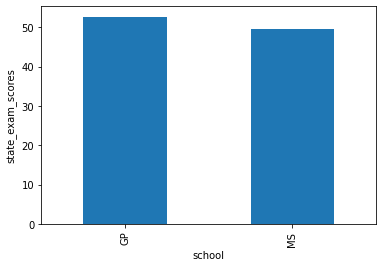

In [11]:
students_stat.groupby('school')['state_exam_scores'].mean().plot(kind='bar') 
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

По оценке вляния школы на баллы по госэкзамену по математике в среднем одинаковые, можно предположить, что данный столбец большую ценности для анализа не имеет.

# 2. Анализ данных в столбце 'students_gender'

In [12]:
# Посмотрим какое количество парней и девушек в датафрейме ('F' - женский, 'M' - мужской)
pd.DataFrame(students_stat.students_gender.value_counts())

students_gender
F              208
M              187

In [13]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['students_gender']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   students_gender  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [14]:
students_stat.groupby(['students_gender'])['state_exam_scores'].aggregate('mean')

students_gender
F    50.098039
M    54.648649
Name: state_exam_scores, dtype: float64

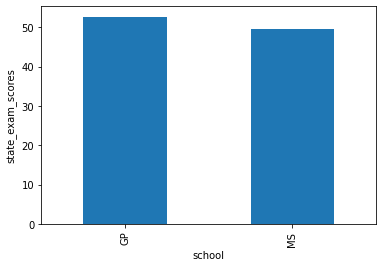

In [15]:
students_stat.groupby('school')['state_exam_scores'].mean().plot(kind='bar') 
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Гендерный признак влияет на баллы по госэкзамену по математике в среднем одинаково, можно предположить, что данный столбец большую ценности для анализа не имеет.

# 3. Анализ данных в столбце 'students_age'

In [16]:
# Посмотрим соотношение возраста учеников
pd.DataFrame(students_stat.students_age.value_counts())

students_age
16           104
17            98
18            82
15            82
19            24
20             3
22             1
21             1

In [17]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['students_age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   students_age  395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: students_age, dtype: float64

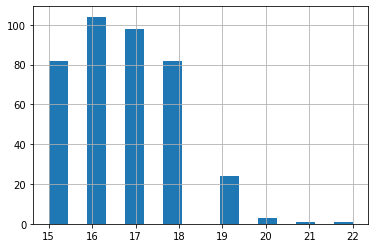

In [18]:
# Посмотрим распределение возраста студентов на гистограмме на наличие аномалий и выбросов
students_stat.students_age.hist(bins = 16)
students_stat.students_age.describe()

Видим, что основное распределение лежит между 15 и 19 годами и есть потенциальные выбросы свыше 19 лет.

<AxesSubplot:xlabel='students_age'>

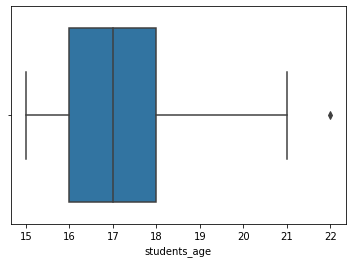

In [19]:
# Посмотрим наличие выбросов на графике Box plot
sns.boxplot(x = 'students_age', data = students_stat)

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


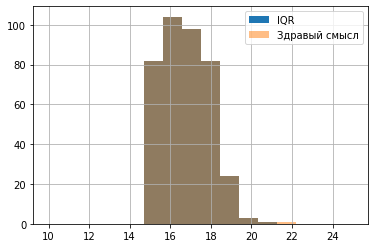

In [20]:
# Вычислим выбросы по формулам
perc25_stud_age = perc25(students_stat.students_age)
perc75_stud_age = perc75(students_stat.students_age)
IQR_stud_age = IQR(students_stat.students_age)

print('25-й перцентиль: {},'.format(perc25_stud_age),
      '75-й перцентиль: {},'.format(perc75_stud_age),
      "IQR: {}, ".format(IQR_stud_age),
      "Границы выбросов: [{f}, {l}].".format(f=perc25_stud_age - 1.5*IQR_stud_age, 
                                             l=perc75_stud_age + 1.5*IQR_stud_age))

students_stat.students_age.loc[students_stat.students_age.between(
    outlier_low(students_stat.students_age),
    outlier_high(students_stat.students_age))].hist(bins=16, range=(10, 25), label='IQR')

students_stat.students_age.loc[students_stat.students_age <= 25].hist(
    alpha=0.5, bins=16, range=(10, 25), label='Здравый смысл')

plt.legend()

In [21]:
# Удалим выбросы
students_stat = students_stat.loc[students_stat.students_age.between(outlier_low(students_stat.students_age),
                                                                     outlier_high(students_stat.students_age))]

In [22]:
students_stat.groupby(['students_age'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['students_age'])['state_exam_scores'].value_counts()

students_age
15    56.280488
16    55.194175
17    51.377551
18    48.312500
19    40.238095
20    70.000000
21    35.000000
Name: state_exam_scores, dtype: float64

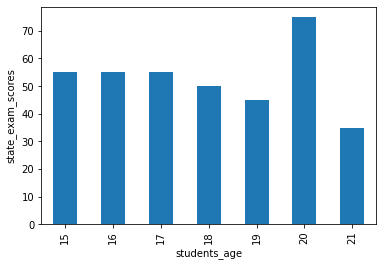

In [23]:
students_stat.groupby('students_age')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

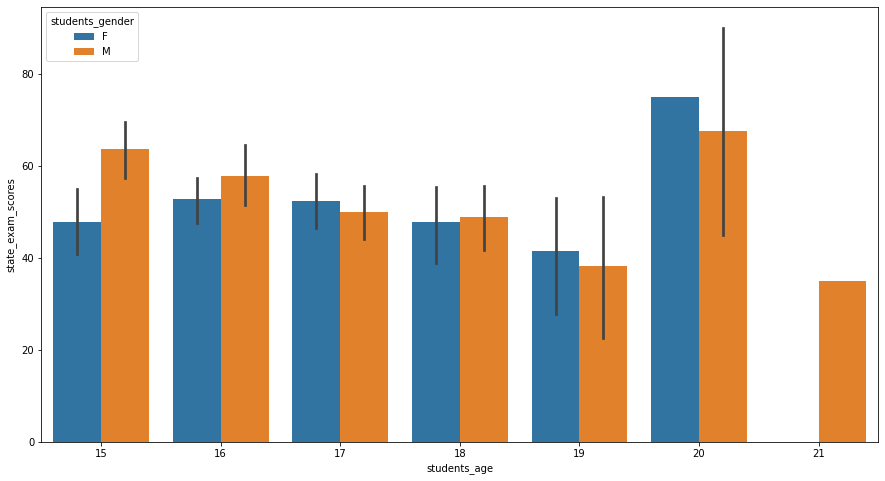

In [24]:
plt.figure(figsize=(15, 8))
sns.barplot(x='students_age', y='state_exam_scores', hue='students_gender', data=students_stat);

Из диаграмм видно, что с увеличением возраста падает средняя успеваемость, однако в возрасте 20 лет ученики имеют самый высокий средний бал, при условии что он высчитывается всего из 3 значений.

# 4. Анализ данных в столбце 'address'

In [25]:
# Посмотрим соотношение учеников которые живут в городе и за городом ('U' - городской, 'R' - за городом)
pd.DataFrame(students_stat.address.value_counts())

address
U      294
R       83

In [26]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['address']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  377 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


In [27]:
# Посмотрим уникальные значения в столбце
print(students_stat.address.unique())

['U' nan 'R']


In [28]:
# В колонке есть 17 значений "NaN", заменим их на моду   
students_stat.address = students_stat.address.fillna(students_stat.address.mode()[0])

# Проверим уникальеность значений в колонке после замены
print(students_stat.address.unique())

['U' 'R']


In [29]:
students_stat.groupby(['address'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['students_age'])['state_exam_scores'].value_counts()

address
R    46.927711
U    53.754098
Name: state_exam_scores, dtype: float64

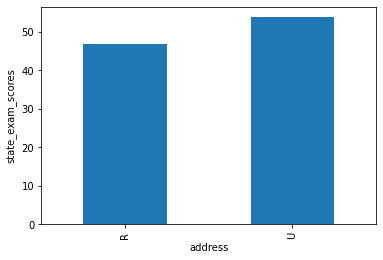

In [30]:
students_stat.groupby('address')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Из диаграммы видно, что успеваемость учеников из города немного выше.

# 5. Анализ данных в столбце 'parents_status'

In [31]:
'''
Рассмотри сперва этот столюец, т.к. от него будет браться условие для family_size. 
Посмотрим статус совместного проживания родителей ('T' - живут вместе 'A' - раздельно)
'''
pd.DataFrame(students_stat.parents_status.value_counts())

parents_status
T             313
A              36

In [32]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['parents_status']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   parents_status  349 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


In [33]:
# В колонке есть 45 значений "NaN", заменим их на моду   
students_stat.parents_status = students_stat.parents_status.fillna(students_stat.parents_status.mode()[0])

# Посмотрим уникальные значения в столбце
print(students_stat.parents_status.unique())

['A' 'T']


In [34]:
print(students_stat.parents_status.value_counts())

T    358
A     36
Name: parents_status, dtype: int64


In [35]:
students_stat.groupby(['parents_status'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['students_age'])['state_exam_scores'].value_counts()

parents_status
A    55.138889
T    52.002841
Name: state_exam_scores, dtype: float64

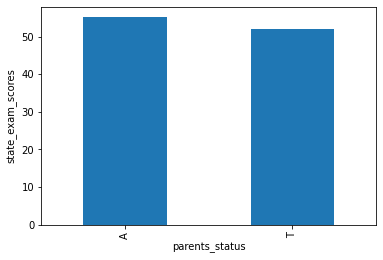

In [36]:
students_stat.groupby('parents_status')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Ученики, у которых родители живут раздельно успеваемость такая же, как и у учеников из полных семей. Данный столбец скорее всего не пригодиться для анализа.

# 6. Анализ данных в столбце 'family_size'

In [37]:
# Посмотрим соотношение размеров семей учеников ('LE3' <= 3, 'GT3' >3)
pd.DataFrame(students_stat.family_size.value_counts())

family_size
GT3          260
LE3          107

In [38]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['family_size']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   family_size  367 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


In [39]:
'''
В колонке есть 27 значений "Nan", заменим их на моду 'GT3' >3 при условии, 
что parents_status будет иметь значение 'T' - живут вместе, иначе
т.к. 'LE3' <= 3, т.к. в семье где родители живут раздельно скорее всего >= 3 человека.
Для столбцов, где оба значения NaN, подставим моду - 'GT3'
'''
n = students_stat.family_size.isna()
m1 = n & (students_stat.parents_status == 'A')
m2 = n & (students_stat.parents_status == 'T')
m3 = n & (students_stat.parents_status.isna())
students_stat.family_size = np.select([m1,m2,m3], ['LE3','GT3','GT3'], default = students_stat.family_size)

# Проверим уникальеность значений в колонке после замены
print(students_stat.family_size.unique())

['LE3' 'GT3']


In [40]:
print(students_stat.family_size.value_counts())

GT3    284
LE3    110
Name: family_size, dtype: int64


In [41]:
students_stat.groupby(['family_size'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['students_age'])['state_exam_scores'].value_counts()

family_size
GT3    51.456835
LE3    54.409091
Name: state_exam_scores, dtype: float64

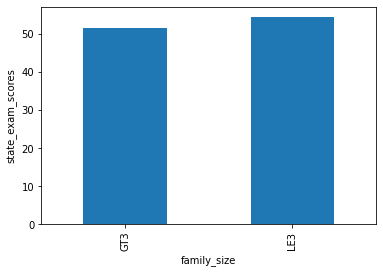

In [42]:
students_stat.groupby('family_size')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Ученики, у которых родители живут раздельно успеваемость такая же, как и у учеников из полных семей. Данный столбец скорее всего не пригодиться для анализа.

# 7. Анализ данных в столбце 'mother_education'

In [43]:
'''
Посмотрим статистику по образованиям матерей 
(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
'''
pd.DataFrame(students_stat.mother_education.value_counts())

mother_education
4.0               131
2.0               102
3.0                96
1.0                59
0.0                 3

In [44]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['mother_education']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mother_education  391 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


In [45]:
# Посмотрим уникальные значения в столбце
print(students_stat.mother_education.unique())

[ 4.  1.  3.  2. nan  0.]


In [46]:
# В колонке есть 3 значения "NaN", заменим их на медиану
students_stat['mother_education'] = students_stat['mother_education'].fillna(
    students_stat['mother_education'].median(skipna=True))

# Проверим уникальеность значений в колонке после замены
print(students_stat.mother_education.unique())

[4. 1. 3. 2. 0.]


<AxesSubplot:xlabel='mother_education'>

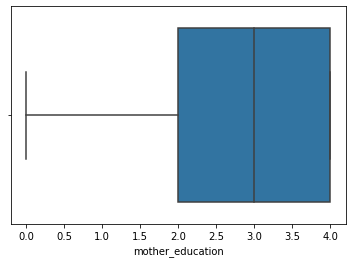

In [47]:
# Посмотрим наличие выбросов на графике Box plot
sns.boxplot(x = 'mother_education', data = students_stat)

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


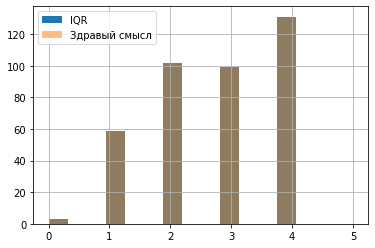

In [48]:
# Вычислим выбросы по формулам
perc25_moth_edu = perc25(students_stat.mother_education)
perc75_moth_edu = perc75(students_stat.mother_education)
IQR_moth_edu = IQR(students_stat.mother_education)

print('25-й перцентиль: {},'.format(perc25_moth_edu),
      '75-й перцентиль: {},'.format(perc75_moth_edu),
      "IQR: {}, ".format(IQR_moth_edu),
      "Границы выбросов: [{f}, {l}].".format(f=perc25_moth_edu - 1.5*IQR_moth_edu, 
                                             l=perc75_moth_edu + 1.5*IQR_moth_edu))

students_stat.mother_education.loc[students_stat.mother_education.between(
    outlier_low(students_stat.mother_education),
    outlier_high(students_stat.mother_education))].hist(bins=16, range=(0, 5), label='IQR')

students_stat.mother_education.loc[students_stat.mother_education <= 150].hist(
    alpha=0.5, bins=16, range=(0, 5), label='Здравый смысл')

plt.legend()

В столбце 'mother_education' выбросов нет

In [49]:
students_stat.groupby(['mother_education'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['mother_education'])['state_exam_scores'].value_counts()

mother_education
0.0    65.000000
1.0    43.125000
2.0    49.600000
3.0    51.173469
4.0    58.816794
Name: state_exam_scores, dtype: float64

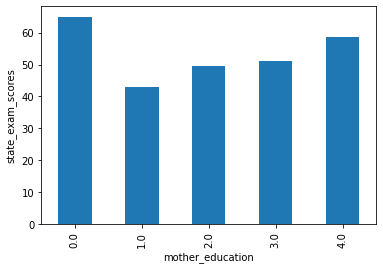

In [50]:
students_stat.groupby('mother_education')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Самая высокая успеваемость у учеников, у которых матери без образования и у которых высшее образование.

# 8. Анализ данных в столбце 'father_education'

In [51]:
'''
Посмотрим статистику по образованиям отцов 
(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
'''
pd.DataFrame(students_stat.father_education.value_counts())

father_education
2.0                106
3.0                 96
4.0                 88
1.0                 77
0.0                  2
40.0                 1

In [52]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['father_education']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   father_education  370 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


In [53]:
# Посмотрим уникальные значения в столбце
print(students_stat.father_education.unique())

[ 4.  1.  2.  3. 40. nan  0.]


In [54]:
# В колонке есть 3 значения "NaN", заменим их на медиану
students_stat['father_education'] = students_stat['father_education'].fillna(
    math.ceil(students_stat['father_education'].median(skipna=True)))

# Проверим уникальеность значений в колонке после замены
print(students_stat.father_education.unique())

[ 4.  1.  2.  3. 40.  0.]


<AxesSubplot:xlabel='father_education'>

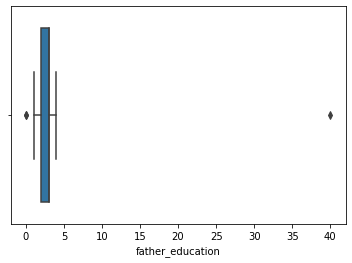

In [55]:
# Посмотрим наличие выбросов на графике Box plot
sns.boxplot(x = 'father_education', data = students_stat)

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


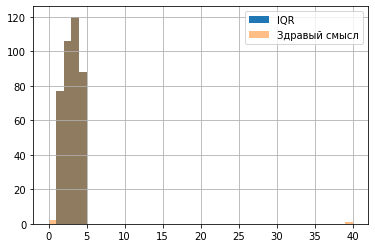

In [56]:
# Вычислим выбросы по формулам
perc25_moth_edu = perc25(students_stat.father_education)
perc75_moth_edu = perc75(students_stat.father_education)
IQR_moth_edu = IQR(students_stat.father_education)

print('25-й перцентиль: {},'.format(perc25_moth_edu),
      '75-й перцентиль: {},'.format(perc75_moth_edu),
      "IQR: {}, ".format(IQR_moth_edu),
      "Границы выбросов: [{f}, {l}].".format(f=perc25_moth_edu - 1.5*IQR_moth_edu, 
                                             l=perc75_moth_edu + 1.5*IQR_moth_edu))

students_stat.father_education.loc[students_stat.father_education.between(
    outlier_low(students_stat.father_education),
    outlier_high(students_stat.father_education))].hist(bins=40, range=(0, 40), label='IQR')

students_stat.father_education.loc[students_stat.father_education <= 150].hist(
    alpha=0.5, bins=40, range=(0, 40), label='Здравый смысл')

plt.legend()

In [57]:
# Удалим выбросы только верхний выброс, т.к. по нижнему информацию нужно проанализировать
students_stat = students_stat.loc[students_stat.father_education < 40]

In [58]:
students_stat.groupby(['father_education'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['father_education'])['state_exam_scores'].value_counts()

father_education
0.0    65.000000
1.0    46.418919
2.0    51.761905
3.0    53.644068
4.0    55.681818
Name: state_exam_scores, dtype: float64

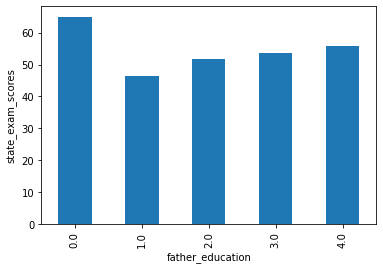

In [59]:
students_stat.groupby('father_education')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Самая высокая успеваемость у учеников, у которых jnws без образования и у которых высшее образование.

# 9. Анализ данных в столбце 'mother_job'

In [60]:
'''
Посмотрим статистику по местам работы матерей ('teacher' - учитель, 'health' - сфера здравоохранения, 
'services' - гос служба, 'at_home' - не работает, 'other' - другое)
'''
pd.DataFrame(students_stat.mother_job.value_counts())

mother_job
other            133
services          96
at_home           58
teacher           55
health            32

In [61]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['mother_job']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mother_job  374 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [62]:
# Посмотрим уникальные значения в столбце
print(students_stat.mother_job.unique())

['at_home' 'health' 'other' 'services' 'teacher' nan]


In [63]:
# В колонке есть 19 значений "NaN", заменим их на моду   
students_stat.mother_job = students_stat.mother_job.fillna(students_stat.mother_job.mode()[0])

# Проверим уникальеность значений в колонке после замены
print(students_stat.mother_job.unique())

['at_home' 'health' 'other' 'services' 'teacher']


In [64]:
print(students_stat.mother_job.value_counts())

other       152
services     96
at_home      58
teacher      55
health       32
Name: mother_job, dtype: int64


In [65]:
students_stat.groupby(['mother_job'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['mother_job'])['state_exam_scores'].value_counts()

mother_job
at_home     45.689655
health      60.625000
other       50.273973
services    54.843750
teacher     55.181818
Name: state_exam_scores, dtype: float64

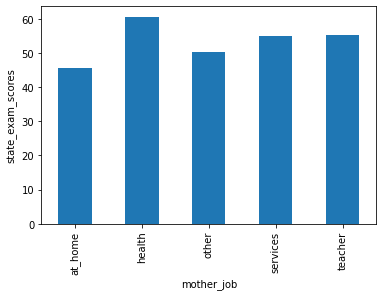

In [66]:
students_stat.groupby('mother_job')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

У учеников, матери которых работают в сфере здравоохранения показатели экзамена немного лучше, чем у остальных.

# 10. Анализ данных в столбце 'father_job'

In [67]:
'''
Посмотрим статистику по местам работы отцов ('teacher' - учитель, 'health' - сфера здравоохранения, 
'services' - гос служба, 'at_home' - не работает, 'other' - другое)
'''
pd.DataFrame(students_stat.father_job.value_counts())

father_job
other            196
services         101
teacher           29
at_home           16
health            15

In [68]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['father_job']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   father_job  357 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [69]:
# Посмотрим уникальные значения в столбце
print(students_stat.father_job.unique())

['teacher' 'other' nan 'health' 'services' 'at_home']


In [70]:
# В колонке есть 34 значений "NaN", заменим их на моду   
students_stat.father_job = students_stat.father_job.fillna(students_stat.father_job.mode()[0])

# Проверим уникальеность значений в колонке после замены
print(students_stat.father_job.unique())

['teacher' 'other' 'health' 'services' 'at_home']


In [71]:
students_stat.groupby(['father_job'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['father_job'])['state_exam_scores'].value_counts()

father_job
at_home     51.875000
health      55.666667
other       51.855895
services    50.561224
teacher     59.827586
Name: state_exam_scores, dtype: float64

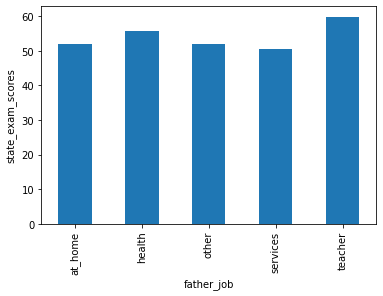

In [72]:
students_stat.groupby('father_job')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

У учеников, отцы которых работают в сфере учителями, показатели экзамена немного лучше, чем у остальных.

# 11. Анализ данных в столбце 'reason_school_choosing'

In [73]:
'''
Посмотрим статистику по причине выбора школы 
('home' - близость к дому, 'reputation' - репутация школы, 
'course' - образовательная программа, 'other' - другое)
'''
pd.DataFrame(students_stat.reason_school_choosing.value_counts())

reason_school_choosing
course                         137
home                           104
reputation                     102
other                           33

In [229]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['reason_school_choosing']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   reason_school_choosing  392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [75]:
# Посмотрим уникальные значения в столбце
print(students_stat.reason_school_choosing.unique())

['course' 'other' 'home' 'reputation' nan]


In [228]:
# В колонке есть 34 значений "NaN", заменим их на моду   
students_stat.reason_school_choosing = students_stat.reason_school_choosing.fillna(students_stat.reason_school_choosing.mode()[0])

# Проверим уникальеность значений в колонке после замены
print(students_stat.reason_school_choosing.unique())

['course' 'other' 'home' 'reputation']


In [76]:
students_stat.groupby(['reason_school_choosing'])['state_exam_scores'].aggregate('median')
#students_stat.groupby(['reason_school_choosing'])['state_exam_scores'].value_counts()

reason_school_choosing
course        50.0
home          55.0
other         55.0
reputation    55.0
Name: state_exam_scores, dtype: float64

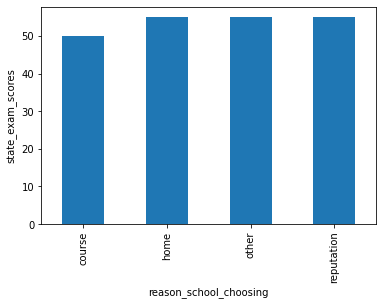

In [77]:
students_stat.groupby('reason_school_choosing')['state_exam_scores'].median().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Причина выбора школы в большой мере на успеваемость не влияет, данный столбец для анализа скорее всего не понадобиться.

# 12. Анализ данных в столбце 'guardian'

In [78]:
'''
Посмотрим статистику опекунства ('mother' - мать, 'father' - отец, 'other' - другое)
'''
pd.DataFrame(students_stat.guardian.value_counts())

guardian
mother       249
father        85
other         28

In [231]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['guardian']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  392 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [80]:
# Посмотрим уникальные значения в столбце
print(students_stat.guardian.unique())

['mother' 'father' 'other' nan]


In [230]:
# В колонке есть 31 значение "NaN", заменим их на моду   
students_stat.guardian = students_stat.guardian.fillna(students_stat.guardian.mode()[0])

# Проверим уникальеность значений в колонке после замены
print(students_stat.guardian.unique())

['mother' 'father' 'other']


In [81]:
students_stat.groupby(['guardian'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['reason_school_choosing'])['state_exam_scores'].value_counts()

guardian
father    53.352941
mother    52.651822
other     45.625000
Name: state_exam_scores, dtype: float64

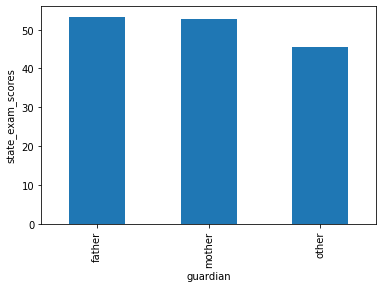

In [82]:
students_stat.groupby('guardian')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Ученики, у которых опекунами является мать или отец, учаться лучше. Скорее всего для анализа данный столбец не пригодиться. 

# 13. Анализ данных в столбце 'travel_time'

In [83]:
'''
Посмотрим статистику времни в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
'''
pd.DataFrame(students_stat.travel_time.value_counts())

travel_time
1.0          241
2.0           96
3.0           21
4.0            7

In [84]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['travel_time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   travel_time  365 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [85]:
# Посмотрим уникальные значения в столбце
print(students_stat.travel_time.unique())

[ 2.  1.  3. nan  4.]


In [86]:
# В колонке есть 28 значений "NaN", заменим их на моду   
students_stat.travel_time = students_stat.travel_time.fillna(students_stat.travel_time.mode()[0])

# Посмотрим уникальные значения в столбце
print(students_stat.travel_time.unique())

[2. 1. 3. 4.]


In [87]:
students_stat.groupby(['travel_time'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['reason_school_choosing'])['state_exam_scores'].value_counts()

travel_time
1.0    53.007519
2.0    51.755319
3.0    45.750000
4.0    50.000000
Name: state_exam_scores, dtype: float64

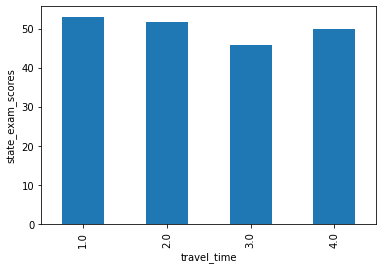

In [88]:
students_stat.groupby('travel_time')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Ученики, которые живут ближе к школе, имеют более высой бал за экзамен

# 14. Анализ данных в столбце 'study_time'

In [89]:
'''
Посмотрим статистику времни на учёбу помимо школы в неделю 
(1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
'''
pd.DataFrame(students_stat.study_time.value_counts())

study_time
2.0         194
1.0         102
3.0          63
4.0          27

In [90]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['study_time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   study_time  386 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [91]:
# Посмотрим уникальные значения в столбце
print(students_stat.study_time.unique())

[ 2.  3.  1. nan  4.]


In [92]:
# В колонке есть 7 значений "NaN", заменим их на медиану
students_stat['study_time'] = students_stat['study_time'].fillna(
    math.ceil(students_stat['study_time'].median(skipna=True)))

# Проверим уникальеность значений в колонке после замены
print(students_stat.study_time.unique())

[2. 3. 1. 4.]


In [93]:
students_stat.groupby(['study_time'])['state_exam_scores'].aggregate('median')
#students_stat.groupby(['reason_school_choosing'])['state_exam_scores'].value_counts()

study_time
1.0    50.0
2.0    55.0
3.0    57.5
4.0    60.0
Name: state_exam_scores, dtype: float64

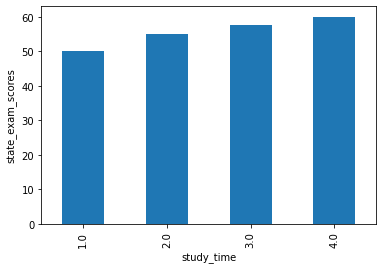

In [94]:
students_stat.groupby('study_time')['state_exam_scores'].median().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Ученики, которые тратят больше 5 часов в неделю, имеют более высокий балл на экзамене.

# 15. Анализ данных в столбце 'failures'

In [95]:
'''
Посмотрим количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
'''
pd.DataFrame(students_stat.failures.value_counts())

failures
0.0       292
1.0        49
2.0        16
3.0        14

In [96]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['failures']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  371 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [97]:
# Посмотрим уникальные значения в столбце
print(students_stat.failures.unique())

[ 0.  3. nan  2.  1.]


In [98]:
# В колонке есть 22 значения "NaN", заменим их на медиану
students_stat['failures'] = students_stat['failures'].fillna(
    math.ceil(students_stat['failures'].median(skipna=True)))

# Проверим уникальеность значений в колонке после замены
print(students_stat.failures.unique())

[0. 3. 2. 1.]


In [99]:
students_stat.groupby(['failures'])['state_exam_scores'].aggregate('median')
#students_stat.groupby(['failures'])['state_exam_scores'].value_counts()

failures
0.0    55.0
1.0    42.5
2.0    40.0
3.0    35.0
Name: state_exam_scores, dtype: float64

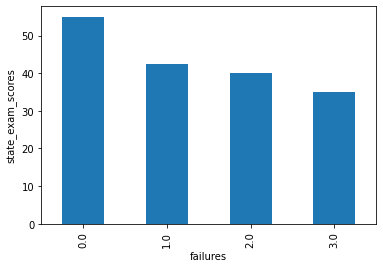

In [100]:
students_stat.groupby('failures')['state_exam_scores'].median().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

In [101]:
students_stat[students_stat.failures == 0.0].head(5)

school students_gender  students_age address family_size parents_status  \
0     GP               F            18       U         LE3              A   
1     GP               F            17       U         GT3              T   
3     GP               F            15       U         GT3              T   
4     GP               F            16       U         GT3              T   
5     GP               M            16       U         LE3              T   

   mother_education  father_education mother_job father_job  \
0               4.0               4.0    at_home    teacher   
1               1.0               1.0    at_home      other   
3               4.0               2.0     health      other   
4               3.0               3.0      other      other   
5               4.0               3.0   services      other   

  reason_school_choosing guardian  travel_time  study_time  failures  \
0                 course   mother          2.0         2.0       0.0   
1                 course   father          1.0         2.0       0.0   
3                   home   mother          1.0         3.0       0.0   
4                   home   father          1.0         2.0       0.0   
5             reputation   mother          1.0         2.0       0.0   

  school_educational_support family_educational_support  \
0                        yes                         no   
1                         no                        yes   
3                         no                        yes   
4                         no                        yes   
5                         no                        yes   

  additional_paid_lessons additional_extracurricular_activities nursery  \
0                      no                                    no     yes   
1                      no                                    no      no   
3                     yes                                   yes     yes   
4                     yes                                    no     yes   
5                     yes                                   yes     yes   

   studytime_granular get_higher_education internet in_romantic_relationship  \
0                -6.0                  yes      NaN                       no   
1                -6.0                  yes      yes                       no   
3                -9.0                  yes      yes                      yes   
4                -6.0                  yes       no                       no   
5                -6.0                  yes      yes                       no   

   family_relationships  free_time  go_out  health_status  absences  \
0                   4.0        3.0     4.0            3.0       6.0   
1                   5.0        3.0     3.0            3.0       4.0   
3                   3.0        2.0     2.0            5.0       2.0   
4                   4.0        3.0     2.0            5.0       4.0   
5                   5.0        4.0     2.0            5.0      10.0   

   state_exam_scores  
0               30.0  
1               30.0  
3               75.0  
4               50.0  
5               75.0

Ученики,у которых не было внеучебных неудач, имеют баллы за экзамен намного выше. На основе данного столбца можно строить дальнейший анализ.

# 16. Анализ данных в столбце 'school_educational_support'

In [102]:
'''
Посмотрим статистику по дополнительной образовательной поддержке (yes или no)
'''
pd.DataFrame(students_stat.school_educational_support.value_counts())

school_educational_support
no                          333
yes                          51

In [103]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['school_educational_support']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   school_educational_support  384 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [104]:
# Посмотрим уникальные значения в столбце
print(students_stat.school_educational_support.unique())

['yes' 'no' nan]


In [105]:
# В колонке есть 9 значений "NaN", заменим их на моду
students_stat.school_educational_support = students_stat.school_educational_support.fillna(
    students_stat.school_educational_support.mode()[0])

# Проверим уникальеность значений в колонке после замены
print(students_stat.school_educational_support.unique())

['yes' 'no']


In [106]:
students_stat.groupby(['school_educational_support'])['state_exam_scores'].aggregate('median')
#students_stat.groupby(['failures'])['state_exam_scores'].value_counts()

school_educational_support
no     55.0
yes    50.0
Name: state_exam_scores, dtype: float64

In [107]:
# Посмотрим на соотношение поддержки в зависимости от школы
students_stat.groupby(['school_educational_support'])['school'].value_counts()
#students_stat.groupby(['failures'])['state_exam_scores'].value_counts()

school_educational_support  school
no                          GP        296
                            MS         46
yes                         GP         51
Name: school, dtype: int64

In [108]:
'''
Поддержка есть только в школе GP, заполним недостающие данные по принципу, 
если школа GP, то есть поддержка, в остальных случаях нет
'''
n = students_stat.school_educational_support.isna()
m1 = n & (students_stat.school == 'GP')
m2 = n & (students_stat.school == 'MS')
m3 = n & (students_stat.school.isna())
students_stat.school_educational_support = np.select([m1, m2, m3], ['yes', 'no', 'no'],
                                                     default=students_stat.school_educational_support)
# Посмотрим уникальные значения в столбце после замены
print(f'{students_stat.school_educational_support.unique()},\n'
      f'{students_stat.school_educational_support.value_counts()}')

['yes' 'no'],
no     342
yes     51
Name: school_educational_support, dtype: int64


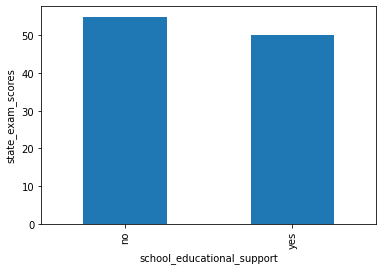

In [109]:
students_stat.groupby('school_educational_support')['state_exam_scores'].median().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Странно, но из данного датафрейма видно, что ученики без дополнительного образования имеют более высший балл за экзамен.

# 17. Анализ данных в столбце 'family_educational_support'

In [110]:
'''
Посмотрим статистику по семейной образовательной поддержке (yes или no)
'''
pd.DataFrame(students_stat.family_educational_support.value_counts())

family_educational_support
yes                         218
no                          136

In [111]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['family_educational_support']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   family_educational_support  354 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [112]:
# Посмотрим уникальные значения в столбце
print(students_stat.family_educational_support.unique())

['no' 'yes' nan]


In [113]:
# В колонке есть 39 значений "NaN", заменим их на моду
students_stat.family_educational_support = students_stat.family_educational_support.fillna(
    students_stat.family_educational_support.mode()[0])

# Проверим уникальеность значений в колонке после замены
print(students_stat.family_educational_support.unique())

['no' 'yes']


In [114]:
students_stat.groupby(['family_educational_support'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['failures'])['state_exam_scores'].value_counts()

family_educational_support
no     52.164179
yes    52.332016
Name: state_exam_scores, dtype: float64

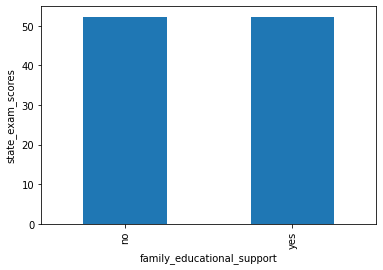

In [115]:
students_stat.groupby('family_educational_support')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Занчения по успеваемости равны для семей с поддержкой и без, одинаково. Скорее всего для анализа данный столбец не пригодиться. 

# 18. Анализ данных в столбце 'additional_paid_lessons'

In [116]:
'''
Посмотрим статистику по дополнительным платным занятиям по математике (yes или no)
'''
pd.DataFrame(students_stat.additional_paid_lessons.value_counts())

additional_paid_lessons
no                       198
yes                      155

In [117]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['additional_paid_lessons']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   additional_paid_lessons  353 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [118]:
# Посмотрим уникальные значения в столбце
print(students_stat.additional_paid_lessons.unique())

['no' nan 'yes']


In [119]:
# В колонке есть 40 значений "NaN", заменим их на моду
students_stat.additional_paid_lessons = students_stat.additional_paid_lessons.fillna(
    students_stat.additional_paid_lessons.mode()[0])

# Проверим уникальеность значений в колонке после замены
print(students_stat.additional_paid_lessons.unique())

['no' 'yes']


In [120]:
students_stat.groupby(['additional_paid_lessons'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['failures'])['state_exam_scores'].value_counts()

additional_paid_lessons
no     50.491453
yes    55.000000
Name: state_exam_scores, dtype: float64

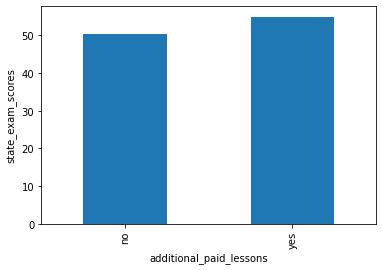

In [121]:
students_stat.groupby('additional_paid_lessons')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Ученики с дополнительными платными занятиями имеют более высокий бол по экзамену.

# 19. Анализ данных в столбце 'additional_extracurricular_activities'

In [122]:
'''
Посмотрим статистику по дополнительным внеучебным занятиям (yes или no)
'''
pd.DataFrame(students_stat.additional_extracurricular_activities.value_counts())

additional_extracurricular_activities
yes                                    194
no                                     185

In [123]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['additional_extracurricular_activities']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   additional_extracurricular_activities  379 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [124]:
# Посмотрим уникальные значения в столбце
print(students_stat.additional_extracurricular_activities.unique())

['no' 'yes' nan]


In [125]:
# В колонке есть 14 значений "NaN", заменим их на моду
students_stat.additional_extracurricular_activities = students_stat.additional_extracurricular_activities.fillna(
    students_stat.additional_extracurricular_activities.mode()[0])

# Проверим уникальеность значений в колонке после замены
print(students_stat.additional_extracurricular_activities.unique())

['no' 'yes']


In [126]:
students_stat.groupby(['additional_extracurricular_activities'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['failures'])['state_exam_scores'].value_counts()

additional_extracurricular_activities
no     52.252747
yes    52.292683
Name: state_exam_scores, dtype: float64

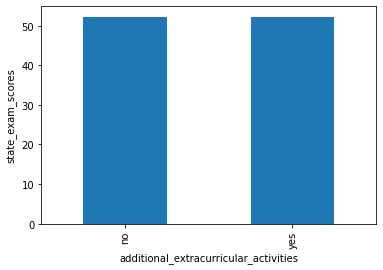

In [127]:
students_stat.groupby('additional_extracurricular_activities')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Занчения по успеваемости равны для учеников с дополнительными внеучебными занятиями и без, одинаково. Скорее всего для анализа данный столбец не пригодиться.

# 20. Анализ данных в столбце 'nursery'

In [128]:
'''
Посмотрим статистику по посещениям детского сада (yes или no)
'''
pd.DataFrame(students_stat.nursery.value_counts())

nursery
yes      299
no        78

In [129]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['nursery']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  377 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [130]:
# Посмотрим уникальные значения в столбце
print(students_stat.nursery.unique())

['yes' 'no' nan]


In [131]:
# В колонке есть 16 значений "NaN", заменим их на моду
students_stat.nursery = students_stat.nursery.fillna(
    students_stat.nursery.mode()[0])

# Проверим уникальеность значений в колонке после замены
print(students_stat.nursery.unique())

['yes' 'no']


In [132]:
students_stat.groupby(['nursery'])['state_exam_scores'].aggregate('median')
#students_stat.groupby(['nursery'])['state_exam_scores'].value_counts()

nursery
no     55.0
yes    55.0
Name: state_exam_scores, dtype: float64

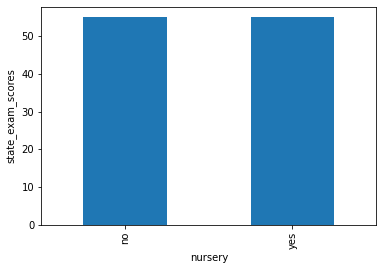

In [133]:
students_stat.groupby('nursery')['state_exam_scores'].median().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Занчения по успеваемости равны для учеников ходивших в сад и нет, одинаково. Скорее всего для анализа данный столбец не пригодиться.

# 21. Анализ данных в столбце 'studytime_granular'

In [243]:
'''
Посмотрим статистику столбца 'studytime_granular' и сравним его со столбцом 'study_time'
'''
display(pd.DataFrame(students_stat.studytime_granular.value_counts()), pd.DataFrame(students_stat.study_time.value_counts()))

studytime_granular
-6.0                  201
-3.0                  101
-9.0                   63
-12.0                  27

study_time
2.0         201
1.0         101
3.0          63
4.0          27

In [135]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['studytime_granular']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   studytime_granular  386 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [239]:
# Посмотрим уникальные значения в столбце
print(students_stat.studytime_granular.unique())

[ -6.  -9.  -3. -12.]


In [238]:
# В колонке есть 7 значений "NaN", заменим их на медиану
students_stat['studytime_granular'] = students_stat['studytime_granular'].fillna(
    math.ceil(students_stat['studytime_granular'].median(skipna=True)))

# Проверим уникальеность значений в колонке после замены
print(students_stat.studytime_granular.unique())

[ -6.  -9.  -3. -12.]


In [137]:
students_stat.groupby(['studytime_granular'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['nursery'])['state_exam_scores'].value_counts()

studytime_granular
-12.0    56.296296
-9.0     57.741935
-6.0     50.820106
-3.0     49.558824
Name: state_exam_scores, dtype: float64

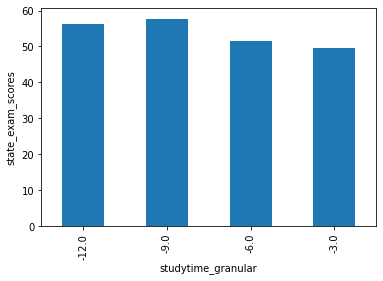

In [240]:
students_stat.groupby('studytime_granular')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

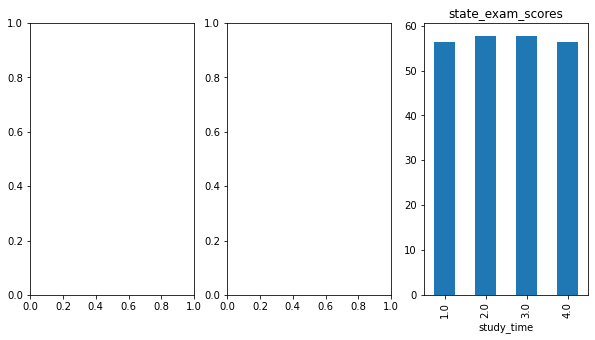

In [268]:
fig, axes = plt.subplots(1, 3, figsize = (10,5))
axes[1] = students_stat.groupby('studytime_granular')['state_exam_scores'].mean().plot(kind='bar')
axes[1].set_title('state_exam_scores')
axes[0] = students_stat.groupby('study_time')['state_exam_scores'].mean().plot(kind='bar')


<AxesSubplot:ylabel='Frequency'>

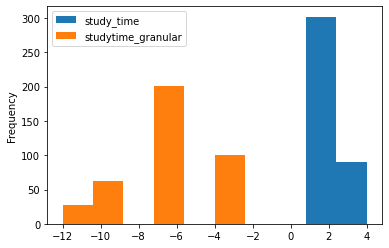

In [252]:
students_stat[['study_time', 'studytime_granular']].plot( kind = 'hist')

In [242]:
students_stat.corr()

students_age  mother_education  father_education  \
students_age              1.000000         -0.171498         -0.147015   
mother_education         -0.171498          1.000000          0.613080   
father_education         -0.147015          0.613080          1.000000   
travel_time               0.101471         -0.158940         -0.154330   
study_time               -0.000050          0.078136          0.006445   
failures                  0.200608         -0.250428         -0.249039   
studytime_granular        0.000050         -0.078136         -0.006445   
family_relationships      0.054245         -0.018707         -0.030967   
free_time                 0.012560          0.021514         -0.010746   
go_out                    0.114767          0.059334          0.051501   
health_status            -0.043033         -0.047854          0.016800   
absences                  0.089700         -0.010937          0.021664   
state_exam_scores        -0.148872          0.205965          0.119060   

                      travel_time  study_time  failures  studytime_granular  \
students_age             0.101471   -0.000050  0.200608            0.000050   
mother_education        -0.158940    0.078136 -0.250428           -0.078136   
father_education        -0.154330    0.006445 -0.249039           -0.006445   
travel_time              1.000000   -0.106730  0.063465            0.106730   
study_time              -0.106730    1.000000 -0.150868           -1.000000   
failures                 0.063465   -0.150868  1.000000            0.150868   
studytime_granular       0.106730   -1.000000  0.150868            1.000000   
family_relationships    -0.030326    0.027913 -0.007643           -0.027913   
free_time               -0.005815   -0.118049  0.096264            0.118049   
go_out                   0.059670   -0.046457  0.105593            0.046457   
health_status           -0.048690   -0.078068  0.090185            0.078068   
absences                -0.036969   -0.023213  0.051042            0.023213   
state_exam_scores       -0.059427    0.110681 -0.326238           -0.110681   

                      family_relationships  free_time    go_out  \
students_age                      0.054245   0.012560  0.114767   
mother_education                 -0.018707   0.021514  0.059334   
father_education                 -0.030967  -0.010746  0.051501   
travel_time                      -0.030326  -0.005815  0.059670   
study_time                        0.027913  -0.118049 -0.046457   
failures                         -0.007643   0.096264  0.105593   
studytime_granular               -0.027913   0.118049  0.046457   
family_relationships              1.000000   0.159689  0.065046   
free_time                         0.159689   1.000000  0.285676   
go_out                            0.065046   0.285676  1.000000   
health_status                     0.102166   0.069413 -0.002699   
absences                         -0.079660   0.006717 -0.051347   
state_exam_scores                 0.050459   0.018740 -0.124762   

                      health_status  absences  state_exam_scores  
students_age              -0.043033  0.089700          -0.148872  
mother_education          -0.047854 -0.010937           0.205965  
father_education           0.016800  0.021664           0.119060  
travel_time               -0.048690 -0.036969          -0.059427  
study_time                -0.078068 -0.023213           0.110681  
failures                   0.090185  0.051042          -0.326238  
studytime_granular         0.078068  0.023213          -0.110681  
family_relationships       0.102166 -0.079660           0.050459  
free_time                  0.069413  0.006717           0.018740  
go_out                    -0.002699 -0.051347          -0.124762  
health_status              1.000000 -0.016346          -0.074670  
absences                  -0.016346  1.000000           0.063510  
state_exam_scores         -0.074670  0.063510           1.000000

# 22. Анализ данных в столбце 'get_higher_education'

In [141]:
'''
Посмотрим статистику хотят ли ученики получить высшее образование (yes или no)
'''
pd.DataFrame(students_stat.get_higher_education.value_counts())

get_higher_education
yes                   355
no                     18

In [142]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['get_higher_education']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   get_higher_education  373 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [143]:
# Посмотрим уникальные значения в столбце
print(students_stat.get_higher_education.unique())

['yes' nan 'no']


In [144]:
# В колонке есть 20 значений "NaN", заменим их на моду
students_stat.get_higher_education = students_stat.get_higher_education.fillna(
    students_stat.nursery.mode()[0])

# Проверим уникальеность значений в колонке после замены
print(students_stat.get_higher_education.unique())

['yes' 'no']


In [213]:
'''
В колонке есть 27 значений "Nan", заменим их на моду 'GT3' >3 при условии, 
что parents_status будет иметь значение 'T' - живут вместе, иначе
т.к. 'LE3' <= 3, т.к. в семье где родители живут раздельно скорее всего >= 3 человека.
Для столбцов, где оба значения NaN, подставим моду - 'GT3'
'''

m1 = (students_stat.get_higher_education == 'yes')
m2 = (students_stat.get_higher_education == 'no')

students_stat.get_higher_education = np.select([m1,m2], ['int(1)','int(2)'], default = students_stat.get_higher_education)

# Проверим уникальеность значений в колонке после замены
print(students_stat.get_higher_education.unique())


['1' '0']


In [145]:
students_stat.groupby(['get_higher_education'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['nursery'])['state_exam_scores'].value_counts()

get_higher_education
no     33.333333
yes    53.197832
Name: state_exam_scores, dtype: float64

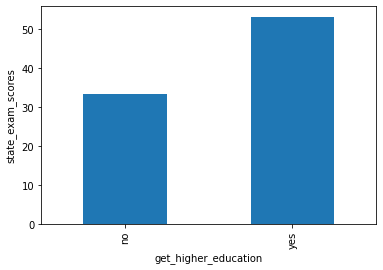

In [146]:
students_stat.groupby('get_higher_education')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

# 23. Анализ данных в столбце 'internet'

In [147]:
'''
Посмотрим статистику по наличию интернета дома (yes или no)
'''
pd.DataFrame(students_stat.internet.value_counts())

internet
yes       303
no         56

In [148]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['internet']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  359 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [149]:
# Посмотрим уникальные значения в столбце
print(students_stat.internet.unique())

[nan 'yes' 'no']


In [150]:
# В колонке есть 44 значений "NaN", заменим их на моду
students_stat.internet = students_stat.internet.fillna(
    students_stat.internet.mode()[0])

# Проверим уникальеность значений в колонке после замены
print(students_stat.internet.unique())

['yes' 'no']


In [151]:
students_stat.groupby(['internet'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['internet'])['state_exam_scores'].value_counts()

internet
no     49.090909
yes    52.801205
Name: state_exam_scores, dtype: float64

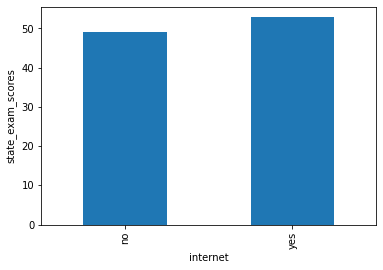

In [152]:
students_stat.groupby('internet')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

# 24. Анализ данных в столбце 'in_romantic_relationship'

In [153]:
'''
Посмотрим статистику по нахождению учеников в романтических отношениях (yes или no)
'''
pd.DataFrame(students_stat.in_romantic_relationship.value_counts())

in_romantic_relationship
no                        239
yes                       123

In [154]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['in_romantic_relationship']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   in_romantic_relationship  362 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [155]:
# Посмотрим уникальные значения в столбце
print(students_stat.in_romantic_relationship.unique())

['no' nan 'yes']


In [156]:
# В колонке есть 31 значение "NaN", заменим их на моду
students_stat.in_romantic_relationship = students_stat.in_romantic_relationship.fillna(
    students_stat.in_romantic_relationship.mode()[0])

# Проверим уникальеность значений в колонке после замены
print(students_stat.in_romantic_relationship.unique())

['no' 'yes']


In [157]:
students_stat.groupby(['in_romantic_relationship'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['in_romantic_relationship'])['state_exam_scores'].value_counts()

in_romantic_relationship
no     54.358491
yes    47.745902
Name: state_exam_scores, dtype: float64

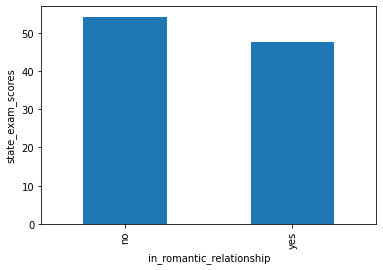

In [158]:
students_stat.groupby('in_romantic_relationship')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Ученики, которые не состоят в отношениях сдали экзамен лучше.

# 25. Анализ данных в столбце 'family_relationships'

In [159]:
'''
Посмотрим статистику по уровню семейных отношений (от 1 - очень плохо до 5 - очень хорошо)
'''
pd.DataFrame(students_stat.family_relationships.value_counts())

family_relationships
 4.0                   182
 5.0                    97
 3.0                    62
 2.0                    17
 1.0                     7
-1.0                     1

In [160]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['family_relationships']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   family_relationships  366 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [161]:
# Посмотрим уникальные значения в столбце
print(students_stat.family_relationships.unique())

[ 4.  5.  3. nan -1.  2.  1.]


In [162]:
# В колонке есть 27 значений "NaN", заменим их на медиану
students_stat['family_relationships'] = students_stat['family_relationships'].fillna(
    math.ceil(students_stat['family_relationships'].median(skipna=True)))

# Проверим уникальеность значений в колонке после замены
print(students_stat.family_relationships.unique())

[ 4.  5.  3. -1.  2.  1.]


<AxesSubplot:xlabel='family_relationships'>

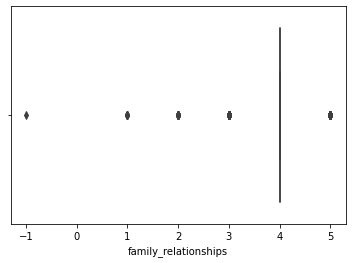

In [163]:
# Посмотрим наличие выбросов на графике Box plot
sns.boxplot(x = 'family_relationships', data = students_stat)

25-й перцентиль: 4.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [4.0, 4.0].


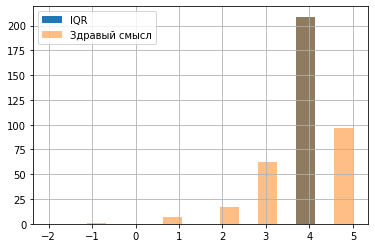

In [164]:
# Вычислим выбросы по формулам
perc25_fam_rel = perc25(students_stat.family_relationships)
perc75_fam_rel = perc75(students_stat.family_relationships)
IQR_fam_rel = IQR(students_stat.family_relationships)

print('25-й перцентиль: {},'.format(perc25_fam_rel),
      '75-й перцентиль: {},'.format(perc75_fam_rel),
      "IQR: {}, ".format(IQR_stud_age),
      "Границы выбросов: [{f}, {l}].".format(f=perc25_fam_rel - 1.5*IQR_fam_rel,
                                             l=perc75_fam_rel + 1.5*IQR_fam_rel))

students_stat.family_relationships.loc[students_stat.family_relationships.between(
    outlier_low(students_stat.family_relationships),
    outlier_high(students_stat.family_relationships))].hist(bins=16, range=(-2, 5), label='IQR')

students_stat.family_relationships.loc[students_stat.family_relationships <= 25].hist(
    alpha=0.5, bins=16, range=(-2, 5), label='Здравый смысл')

plt.legend()

In [165]:
# Удалим явный выброс -1 и 0, а остальные оставим для дальнейшего анализа
students_stat = students_stat.loc[students_stat.family_relationships >= 1]

In [166]:
students_stat.groupby(['family_relationships'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['in_romantic_relationship'])['state_exam_scores'].value_counts()

family_relationships
1.0    55.000000
2.0    48.529412
3.0    51.451613
4.0    51.536585
5.0    55.000000
Name: state_exam_scores, dtype: float64

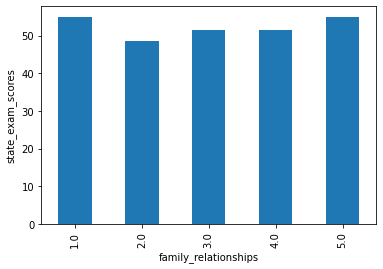

In [167]:
students_stat.groupby('family_relationships')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Ученики, у которых в семье все плохо и и наоборот все хорошо, имеют в среднем одинаковые показатели по оценкам.

# 26. Анализ данных в столбце 'free_time'

In [168]:
'''
Посмотрим статистику по наличию свободного времени после школы (от 1 - очень мало до 5 - очень мого)
'''
pd.DataFrame(students_stat.free_time.value_counts())

free_time
3.0        153
4.0        111
2.0         61
5.0         38
1.0         18

In [169]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['free_time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   free_time  381 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [170]:
# Посмотрим уникальные значения в столбце
print(students_stat.free_time.unique())

[ 3.  2.  4.  1.  5. nan]


In [171]:
# В колонке есть 11 значений "NaN", заменим их на медиану
students_stat['free_time'] = students_stat['free_time'].fillna(
    math.ceil(students_stat['free_time'].median(skipna=True)))

# Проверим уникальеность значений в колонке после замены
print(students_stat.free_time.unique())

[3. 2. 4. 1. 5.]


In [172]:
students_stat.groupby(['free_time'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['free_time'])['state_exam_scores'].value_counts()

free_time
1.0    48.333333
2.0    57.786885
3.0    49.440994
4.0    52.752294
5.0    56.351351
Name: state_exam_scores, dtype: float64

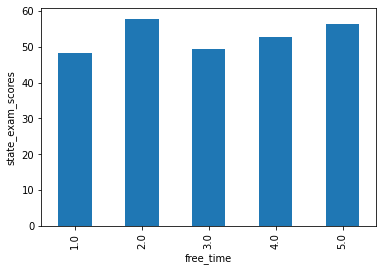

In [173]:
students_stat.groupby('free_time')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Ученики, с небольшим количеством времени (2) и с самым большим количеством времени (5) имеют более высокий балл.

# 27. Анализ данных в столбце 'go_out'

In [174]:
'''
Посмотрим статистику по проведению времени с друзьями (от 1 - очень мало до 5 - очень много)
'''
pd.DataFrame(students_stat.go_out.value_counts())

go_out
3.0     127
2.0      99
4.0      84
5.0      51
1.0      23

In [175]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['go_out']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   go_out  384 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [176]:
# Посмотрим уникальные значения в столбце
print(students_stat.go_out.unique())

[ 4.  3.  2.  1.  5. nan]


In [177]:
# В колонке есть 8 значений "NaN", заменим их на медиану
students_stat['go_out'] = students_stat['go_out'].fillna(
    math.ceil(students_stat['go_out'].median(skipna=True)))

# Проверим уникальеность значений в колонке после замены
print(students_stat.go_out.unique())

[4. 3. 2. 1. 5.]


In [178]:
students_stat.groupby(['go_out'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['go_out'])['state_exam_scores'].value_counts()

go_out
1.0    49.347826
2.0    56.111111
3.0    54.586466
4.0    49.506173
5.0    44.600000
Name: state_exam_scores, dtype: float64

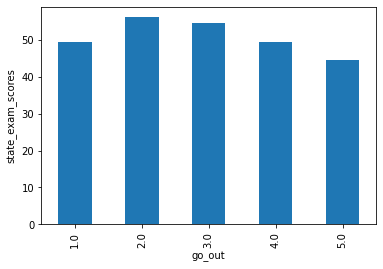

In [179]:
students_stat.groupby('go_out')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Ученики, которые иногда (2) видятся с друзьями, имеют более высокую оценку.

# 28. Анализ данных в столбце 'health_status'

In [180]:
'''
Посмотрим статистику по текущему состоянию здоровья (от 1 - очень плохо до 5 - очень хорошо)
'''
pd.DataFrame(students_stat.health_status.value_counts())

health_status
5.0            137
3.0             89
4.0             62
1.0             46
2.0             43

In [181]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['health_status']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   health_status  377 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [182]:
# Посмотрим уникальные значения в столбце
print(students_stat.health_status.unique())

[ 3.  5.  1.  2.  4. nan]


In [183]:
# В колонке есть 15 значений "NaN", заменим их на медиану
students_stat['health_status'] = students_stat['health_status'].fillna(
    math.ceil(students_stat['health_status'].median(skipna=True)))

# Проверим уникальеность значений в колонке после замены
print(students_stat.health_status.unique())

[3. 5. 1. 2. 4.]


In [184]:
students_stat.groupby(['health_status'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['health_status'])['state_exam_scores'].value_counts()

health_status
1.0    59.782609
2.0    52.619048
3.0    50.625000
4.0    49.527027
5.0    52.279412
Name: state_exam_scores, dtype: float64

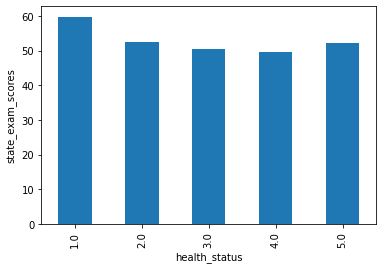

In [185]:
students_stat.groupby('health_status')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

Ученики, с плохим сосоянием здоровья учаться лучше.

# 29. Анализ данных в столбце 'absences'

In [186]:
'''
Посмотрим статистику по количеству пропущенных занятий
'''
pd.DataFrame(students_stat.absences.value_counts())

absences
0.0         111
2.0          60
4.0          52
6.0          31
8.0          21
10.0         17
12.0         12
14.0         11
3.0           8
16.0          6
7.0           6
18.0          5
5.0           5
20.0          4
22.0          3
9.0           3
1.0           3
15.0          2
13.0          2
11.0          2
25.0          1
54.0          1
385.0         1
26.0          1
56.0          1
24.0          1
212.0         1
21.0          1
75.0          1
30.0          1
19.0          1
38.0          1
40.0          1
23.0          1
17.0          1
28.0          1

In [226]:
# Посмотрим есть ли незаполненные ячейки
students_stat.loc[:, ['absences']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  392 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [188]:
# Посмотрим уникальные значения в столбце
print(students_stat.absences.unique())

[  6.   4.  10.   2.   0.  16.  nan   7.   8.  25.  14.  12.  54.  18.
  26.  20.  56.  24.  28.   5.  13.  15.  22.   3. 385.  21.   1.  75.
  30.  19.   9.  11.  38.  40.  23.  17. 212.]


In [189]:
# В колонке есть 12 значений "NaN", заменим их на медиану
students_stat['absences'] = students_stat['absences'].fillna(
    math.ceil(students_stat['absences'].median(skipna=True)))

# Проверим уникальеность значений в колонке после замены
print(students_stat.absences.unique())

[  6.   4.  10.   2.   0.  16.   7.   8.  25.  14.  12.  54.  18.  26.
  20.  56.  24.  28.   5.  13.  15.  22.   3. 385.  21.   1.  75.  30.
  19.   9.  11.  38.  40.  23.  17. 212.]


In [190]:
students_stat.groupby(['absences'])['state_exam_scores'].aggregate('mean')
#students_stat.groupby(['absences'])['state_exam_scores'].value_counts()

absences
0.0      42.363636
1.0      65.000000
2.0      58.916667
3.0      57.857143
4.0      57.096774
5.0      58.000000
6.0      59.166667
7.0      62.500000
8.0      51.750000
9.0      66.666667
10.0     56.176471
11.0     65.000000
12.0     53.750000
13.0     52.500000
14.0     47.272727
15.0     40.000000
16.0     50.833333
17.0     50.000000
18.0     42.000000
19.0     50.000000
20.0     57.500000
21.0     90.000000
22.0     40.000000
23.0     65.000000
24.0     90.000000
25.0     55.000000
26.0     30.000000
28.0     45.000000
30.0     40.000000
38.0     40.000000
40.0     55.000000
54.0     55.000000
56.0     40.000000
75.0     45.000000
212.0    45.000000
385.0    85.000000
Name: state_exam_scores, dtype: float64

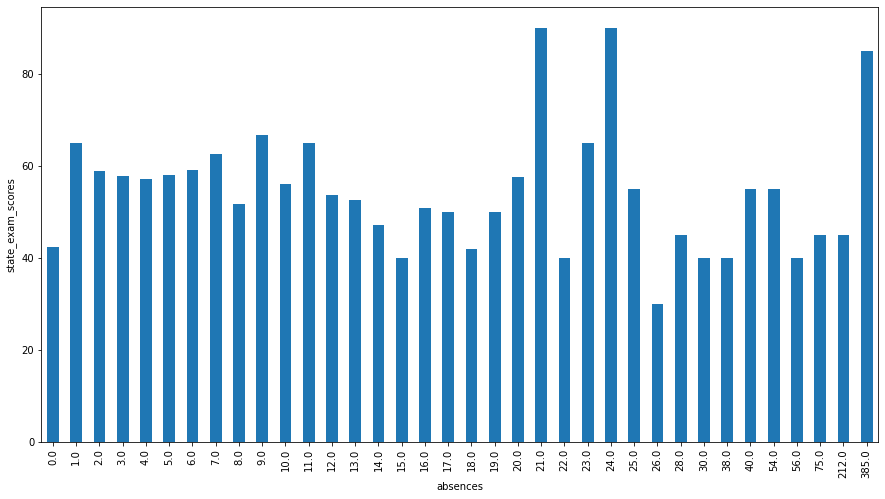

In [191]:
plt.figure(figsize=(15, 8))
students_stat.groupby('absences')['state_exam_scores'].mean().plot(kind='bar')
plt.ylabel('state_exam_scores') # добавляем подпись на оси Оу
plt.show();

# Итоговый анализ данных по датафрейму

<AxesSubplot:>

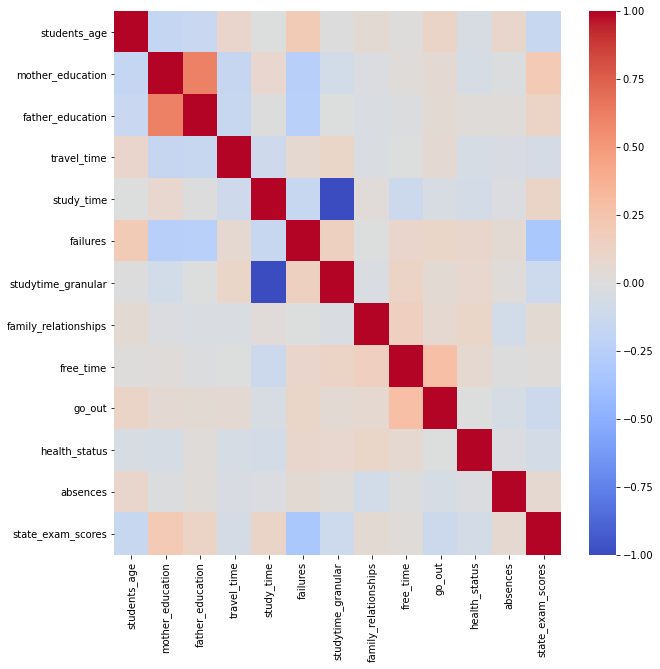

In [225]:
# Проведем корреляционный анализ для числовых столбцов
correlation = students_stat.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cmap = 'coolwarm')

In [202]:
#Выведем корреляционную матрицу
students_stat.corr()

students_age  mother_education  father_education  \
students_age              1.000000         -0.171498         -0.147015   
mother_education         -0.171498          1.000000          0.613080   
father_education         -0.147015          0.613080          1.000000   
travel_time               0.101471         -0.158940         -0.154330   
study_time               -0.000050          0.078136          0.006445   
failures                  0.200608         -0.250428         -0.249039   
studytime_granular        0.000135         -0.078730         -0.006401   
family_relationships      0.054245         -0.018707         -0.030967   
free_time                 0.012560          0.021514         -0.010746   
go_out                    0.114767          0.059334          0.051501   
health_status            -0.043033         -0.047854          0.016800   
absences                  0.089700         -0.010937          0.021664   
state_exam_scores        -0.153589          0.210155          0.121400   

                      travel_time  study_time  failures  studytime_granular  \
students_age             0.101471   -0.000050  0.200608            0.000135   
mother_education        -0.158940    0.078136 -0.250428           -0.078730   
father_education        -0.154330    0.006445 -0.249039           -0.006401   
travel_time              1.000000   -0.106730  0.063465            0.107964   
study_time              -0.106730    1.000000 -0.150868           -1.000000   
failures                 0.063465   -0.150868  1.000000            0.152197   
studytime_granular       0.107964   -1.000000  0.152197            1.000000   
family_relationships    -0.030326    0.027913 -0.007643           -0.028368   
free_time               -0.005815   -0.118049  0.096264            0.119800   
go_out                   0.059670   -0.046457  0.105593            0.046890   
health_status           -0.048690   -0.078068  0.090185            0.078679   
absences                -0.036969   -0.023213  0.051042            0.023287   
state_exam_scores       -0.060775    0.110609 -0.337483           -0.112067   

                      family_relationships  free_time    go_out  \
students_age                      0.054245   0.012560  0.114767   
mother_education                 -0.018707   0.021514  0.059334   
father_education                 -0.030967  -0.010746  0.051501   
travel_time                      -0.030326  -0.005815  0.059670   
study_time                        0.027913  -0.118049 -0.046457   
failures                         -0.007643   0.096264  0.105593   
studytime_granular               -0.028368   0.119800  0.046890   
family_relationships              1.000000   0.159689  0.065046   
free_time                         0.159689   1.000000  0.285676   
go_out                            0.065046   0.285676  1.000000   
health_status                     0.102166   0.069413 -0.002699   
absences                         -0.079660   0.006717 -0.051347   
state_exam_scores                 0.049847   0.018042 -0.126787   

                      health_status  absences  state_exam_scores  
students_age              -0.043033  0.089700          -0.153589  
mother_education          -0.047854 -0.010937           0.210155  
father_education           0.016800  0.021664           0.121400  
travel_time               -0.048690 -0.036969          -0.060775  
study_time                -0.078068 -0.023213           0.110609  
failures                   0.090185  0.051042          -0.337483  
studytime_granular         0.078679  0.023287          -0.112067  
family_relationships       0.102166 -0.079660           0.049847  
free_time                  0.069413  0.006717           0.018042  
go_out                    -0.002699 -0.051347          -0.126787  
health_status              1.000000 -0.016346          -0.075109  
absences                  -0.016346  1.000000           0.063763  
state_exam_scores         -0.075109  0.063763           1.000000

In [195]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='state_exam_scores', 
                data=students_stat.loc[students_stat.loc[:, column].isin(students_stat.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [214]:
students_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   school                                 392 non-null    object 
 1   students_gender                        392 non-null    object 
 2   students_age                           392 non-null    int64  
 3   address                                392 non-null    object 
 4   family_size                            392 non-null    object 
 5   parents_status                         392 non-null    object 
 6   mother_education                       392 non-null    float64
 7   father_education                       392 non-null    float64
 8   mother_job                             392 non-null    object 
 9   father_job                             392 non-null    object 
 10  reason_school_choosing                 375 non-null    object 
 11  guardi

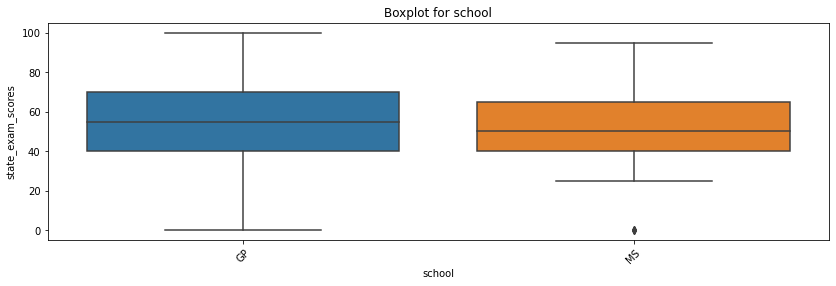

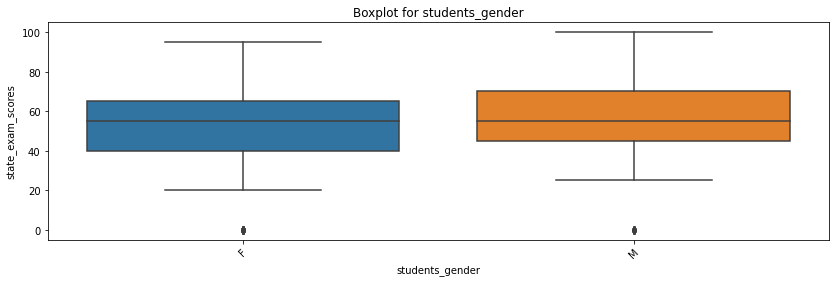

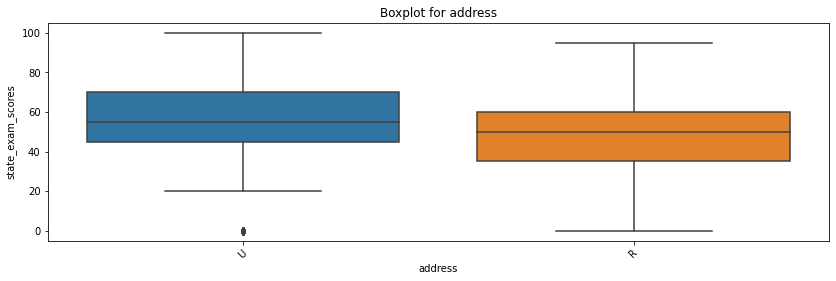

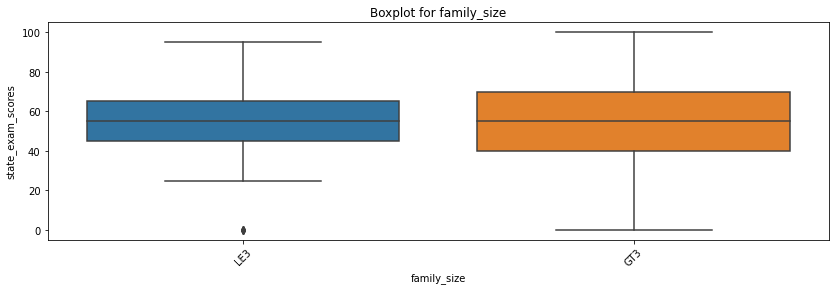

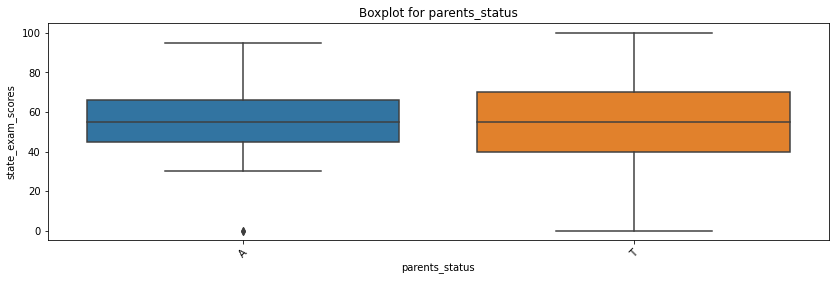

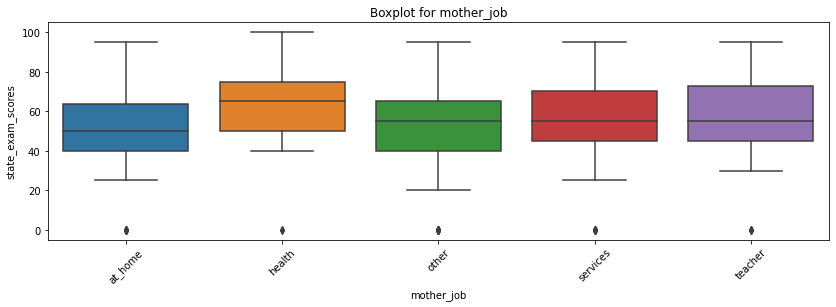

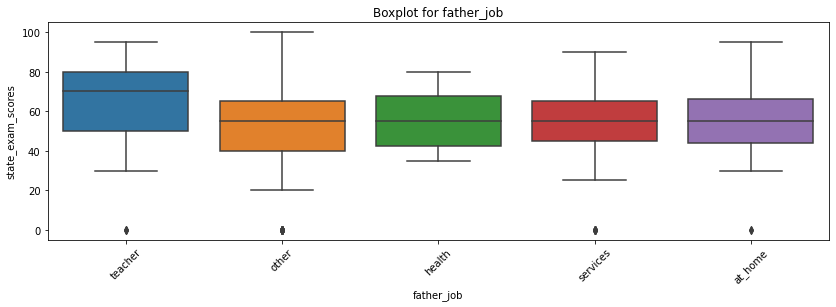

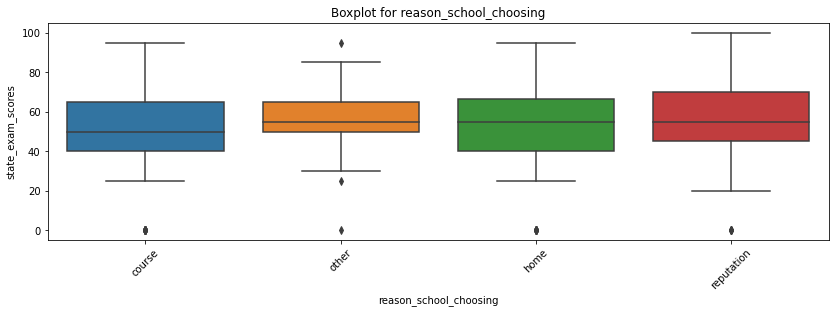

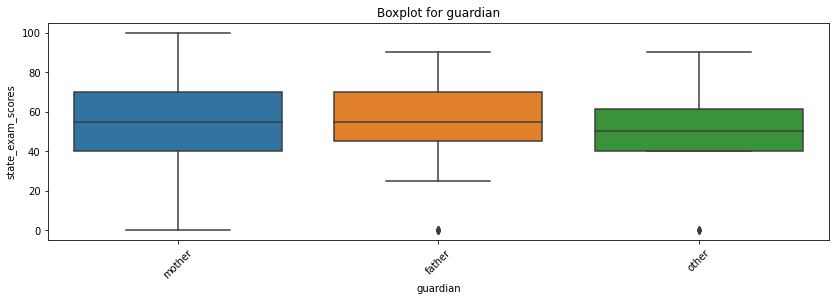

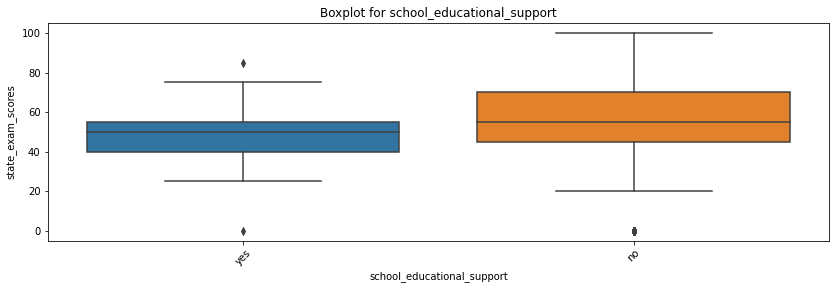

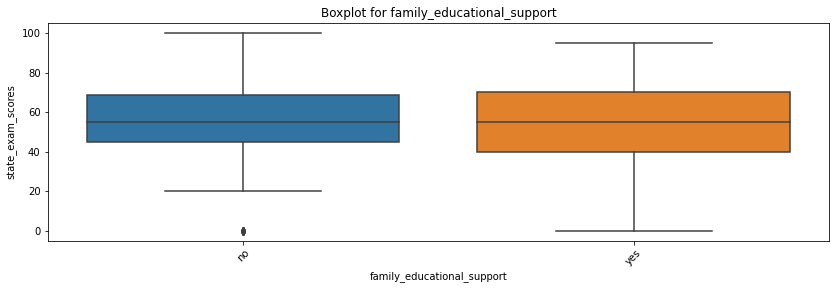

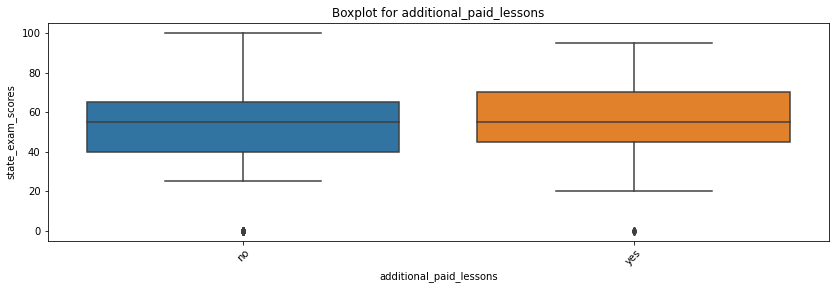

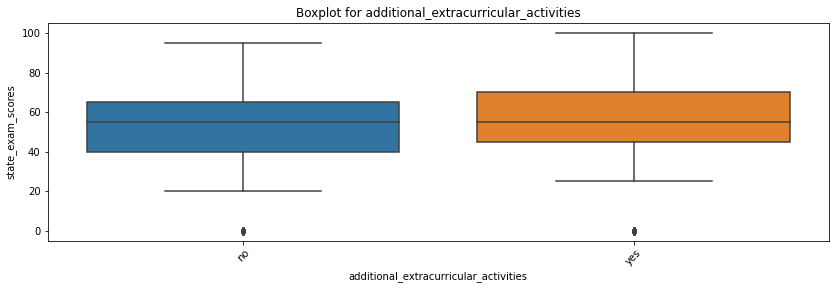

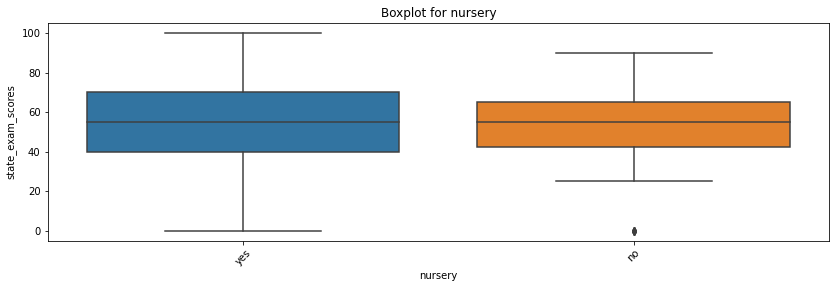

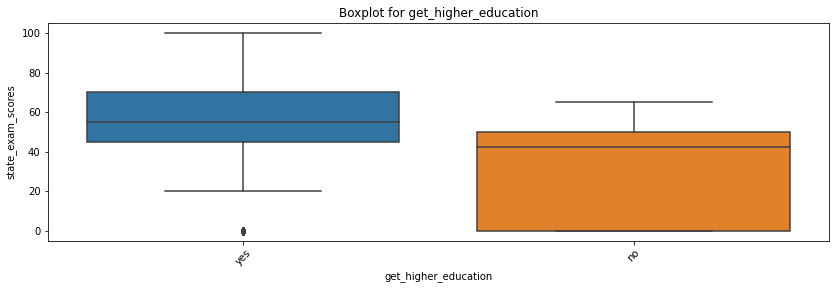

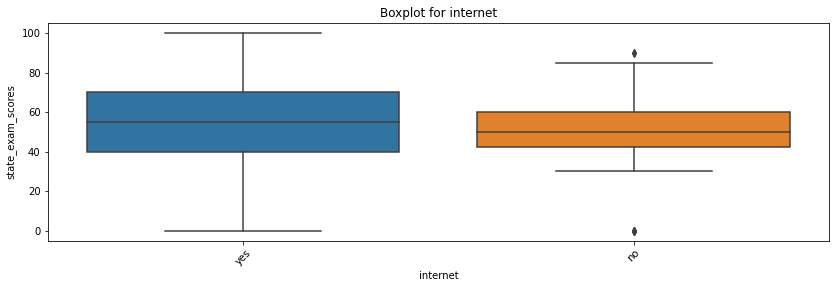

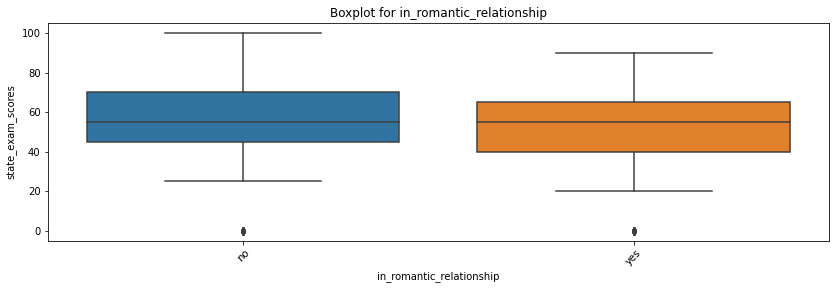

In [201]:
for col in ['school', 'students_gender', 'address', 'family_size', 'parents_status', 'mother_job', 
            'father_job', 'reason_school_choosing', 'guardian', 'school_educational_support', 'family_educational_support',
            'additional_paid_lessons', 'additional_extracurricular_activities', 'nursery', 
            'get_higher_education', 'internet', 'in_romantic_relationship']:
    get_boxplot(col)

In [198]:
def get_stat_dif(column):
    cols = students_stat.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students_stat.loc[students_stat.loc[:, column] == comb[0], 'state_exam_scores'], 
                        students_stat.loc[students_stat.loc[:, column] == comb[1], 'state_exam_scores']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [199]:
for col in ['school', 'students_gender', 'address', 'family_size', 'parents_status', 'mother_job', 
            'father_job', 'reason_school_choosing', 'guardian', 'school_educational_support', 'family_educational_support',
            'additional_paid_lessons', 'additional_extracurricular_activities', 'nursery', 
            'get_higher_education', 'internet', 'in_romantic_relationship']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки mother_job


In [205]:
pd.DataFrame(students_stat.state_exam_scores.value_counts())

state_exam_scores
50.0                  54
55.0                  46
0.0                   37
75.0                  33
65.0                  31
60.0                  30
40.0                  29
70.0                  27
45.0                  27
80.0                  16
30.0                  15
90.0                  12
35.0                   9
25.0                   7
85.0                   6
95.0                   5
100.0                  1
20.0                   1

In [223]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = students_stat[['students_age', 'mother_education', 'father_education', 'travel_time', 
                   'study_time', 'failures', 
                   'family_relationships', 'free_time', 'go_out', 'health_status', 'absences']]
y = students_stat.iloc[:, -1]

bestfeatures = SelectKBest(score_func = chi2, k = 'all')
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Specs', 'Score']  
print(featureScores.nlargest(10, 'Score'))  

               Specs        Score
10          absences  3919.900512
5           failures   123.713057
1   mother_education    13.064922
8             go_out     9.893559
9      health_status     9.581737
2   father_education     7.826171
4         study_time     6.704372
3        travel_time     5.732862
7          free_time     4.372206
0       students_age     1.758941


In [224]:
profile = ProfileReport(students_stat)
profile